In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load data
X = pd.read_csv("featuresMatrix_Preprocessed_OHEColumnsNamed.csv")
y = pd.read_csv("dependentVariableLGAEncoded.csv")

# split data
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [4]:
y.value_counts()

0
0    190
1      6
dtype: int64

In [5]:
X.shape

(196, 57)

In [6]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
X.shape
# same shape as before, so no columns removed, therefore no columns had only 20% variance

(196, 57)

# 1. Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Many different statistical test scan be used with this selection method. For example the ANOVA F-value method is appropriate for numerical inputs and categorical data.

## ANOVA F-value

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns


#print 10 best features
top10= featureScores.nlargest(10,'Score')
print(top10)

                       Feature     Score
22                      highBG  7.068341
52        familyHistoryGDM_YES  6.784551
51         familyHistoryGDM_NO  6.784551
14                      meanBG  6.669806
6   maternalWeight3rdTrimester  5.729890
16                       minBG  5.244379
55              insulinFlag_NO  5.001632
56             insulinFlag_YES  5.001632
3      maternalWeightAtBooking  4.879427
13          GDMInsulinGestWeek  4.126219


In [21]:
p_values = pd.DataFrame({'feature': X.columns, 'p_value':
                         bestfeatures.pvalues_}).sort_values('p_value')

pd.set_option('display.max_rows', 100)
# print (p_values) # print all features and their p_values


# print features with p values less 0.05 only    
top_p_values = p_values[p_values['p_value'] < .05]

display(top_p_values)

for x in (top_p_values['p_value']):
    print ("%.3f" % (x))

,feature,p_value
22,highBG,0.008501
52,familyHistoryGDM_YES,0.009907
51,familyHistoryGDM_NO,0.009907
14,meanBG,0.010542
6,maternalWeight3rdTrimester,0.017631
16,minBG,0.023094
55,insulinFlag_NO,0.026462
56,insulinFlag_YES,0.026462
3,maternalWeightAtBooking,0.028349
13,GDMInsulinGestWeek,0.043588


0.009
0.010
0.010
0.011
0.018
0.023
0.026
0.026
0.028
0.044
0.045
0.048
0.048


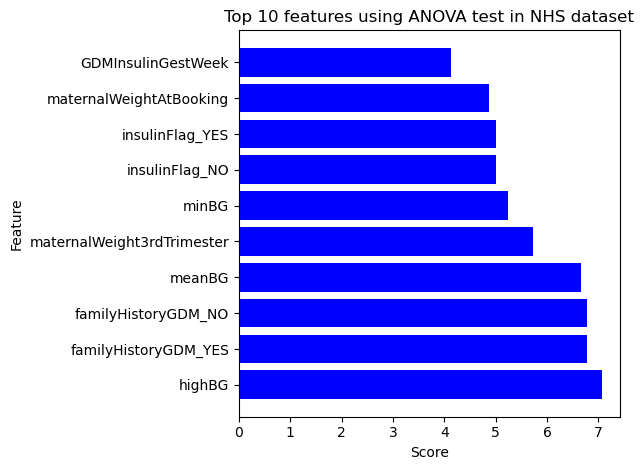

In [22]:
# Now plot top 10 features in histogram
import matplotlib.pyplot as plt

plt.figure()
#plt.xticks(rotation=90)
plt.ylabel("Feature")
plt.xlabel("Score")

plt.title("Top 10 features using ANOVA test in NHS dataset")
plt.barh(top10['Feature'], top10['Score'], color='b', align='center')
plt.tight_layout()

plt.savefig('figures/featureSelection/nhs_anova_top10.png')

plt.show()

In [24]:
# make dataframe with features and their p values
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':
                         bestfeatures.pvalues_}).sort_values('p_value')

pd.set_option('display.max_rows', 100)
# print (p_values) # print all features and their p_values

# print features with p values less 0.05 only
p_values[p_values['p_value'] < .05] 

#keep features with p values less 0.05 only
p_values[p_values['p_value'] < .05] 
#print(p_values)

top_p_values = p_values[p_values['p_value'] < .05] 

display(top_p_values)

,Feature,p_value
22,highBG,0.008501
52,familyHistoryGDM_YES,0.009907
51,familyHistoryGDM_NO,0.009907
14,meanBG,0.010542
6,maternalWeight3rdTrimester,0.017631
16,minBG,0.023094
55,insulinFlag_NO,0.026462
56,insulinFlag_YES,0.026462
3,maternalWeightAtBooking,0.028349
13,GDMInsulinGestWeek,0.043588


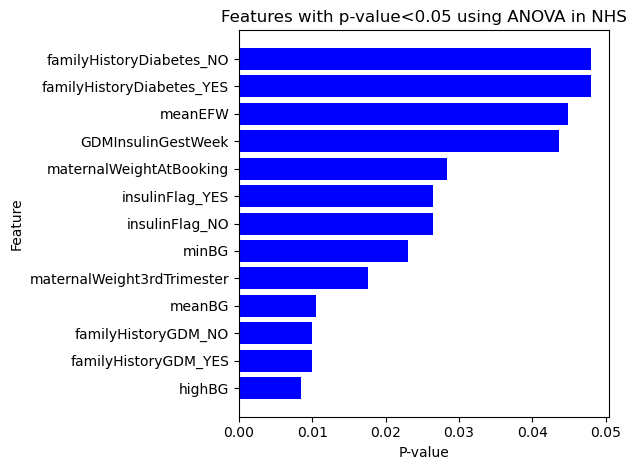

In [11]:
plt.figure()
#plt.xticks(rotation=90)
plt.ylabel("Feature")
plt.xlabel("P-value")
plt.title("Features with p-value<0.05 using ANOVA in NHS")
plt.barh(top_p_values['Feature'], top_p_values['p_value'], color='b', align='center')

plt.tight_layout()

plt.savefig('figures/featureselection/nhs_anova_top_pvalues.png')

plt.show()

## Mutual Information

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                        Feature     Score
35               eclampsiaFH_NO  0.159044
50    familyHistoryDiabetes_YES  0.154792
36  gestationalPre-eclampsia_NO  0.152241
42   gestationalHypertension_NO  0.149690
40            hypertensionFH_NO  0.134933
33            prevMacrosomia_NO  0.128358
51          familyHistoryGDM_NO  0.124829
8                     gravidity  0.122976
53             metforminFlag_NO  0.120523
45        ethnicity_South Asian  0.104773


# 2. Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

[0.01966483 0.01272873 0.03145169 0.02494881 0.02603193 0.01959043
 0.03043285 0.02223933 0.01321534 0.01720384 0.02276722 0.02406735
 0.00674426 0.01314568 0.01978545 0.01951029 0.01967729 0.01164362
 0.01368685 0.01214424 0.01366582 0.02612915 0.03364564 0.02111477
 0.03284889 0.02858987 0.02128297 0.02545083 0.05193034 0.03370189
 0.03139194 0.05198853 0.04421568 0.00186257 0.00010114 0.
 0.00028655 0.         0.01697951 0.01682468 0.00978863 0.00563652
 0.         0.         0.00085965 0.01377889 0.01640865 0.0035281
 0.01078934 0.01200902 0.01134733 0.01956865 0.02826081 0.00357315
 0.00112818 0.01081625 0.01981604]


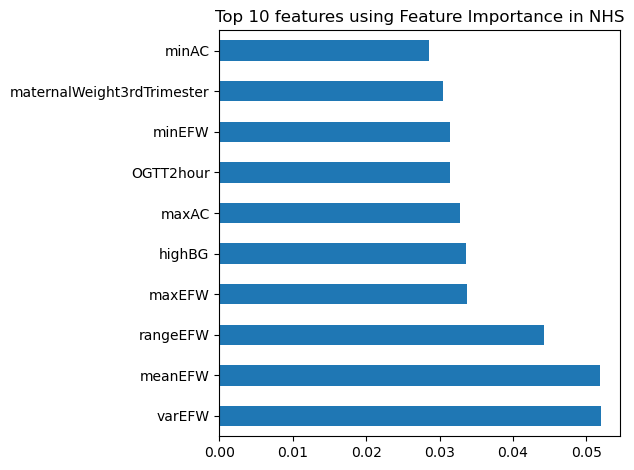

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# different reseults when I run:
# model = ExtraTreesClassifier(n_estimators=10)
# different results every time I run this

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')


#plot
plt.title("Top 10 features using Feature Importance in NHS")
plt.tight_layout()
plt.savefig('figures/featureSelection/nhs_featureImportance.png')

plt.show()

# 3. Recursive Feature Elimination


In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False False  True False  True False False False False False
 False  True False False  True False  True False False False False False
 False  True False False False False False  True False False False False
 False False False False False False False False False False False False
 False  True  True False  True False False False False]
Feature Ranking: [31 23 25  6  1 42  1 47  2 20  3 21 39  1 24  9  1 41  1 17 29 32  8 37
 28  1  7 16 38 19  4  1 18 30 35 48 43 44 36 34 15 12 45 46 14 40 10 26
 22  1  1  5  1 33 27 11 13]


In [27]:
dfranking = pd.DataFrame(fit.ranking_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfranking],axis=1)
featureScores.columns = ['Feature','Ranking']  #naming the dataframe columns
# print(featureScores)
featureScores.loc[featureScores['Ranking'] == 1]

#print(featureScores.nlargest(10,'Score'))  #print 10 best features

,Feature,Ranking
4,maternalHeight,1
6,maternalWeight3rdTrimester,1
13,GDMInsulinGestWeek,1
16,minBG,1
18,countBG,1
25,minAC,1
31,varEFW,1
49,familyHistoryDiabetes_NO,1
50,familyHistoryDiabetes_YES,1
52,familyHistoryGDM_YES,1


In [17]:
# create table with results from all feature selection methods

In [29]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

Optimal number of features: 22


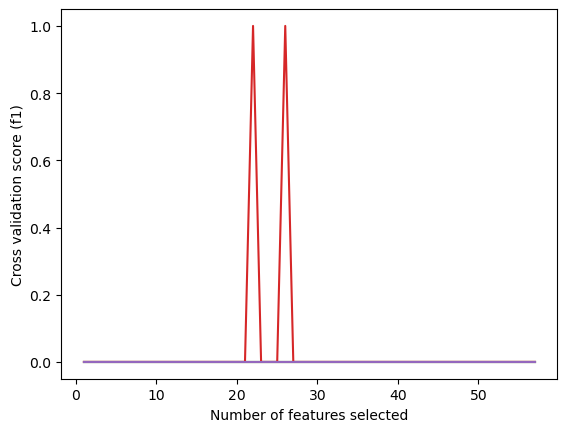

In [31]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


# Create the RFE object and compute a cross-validated score.
model = LogisticRegression()

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=StratifiedKFold(5),
    scoring=f05_score,
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (f1)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

# feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


dfranking = pd.DataFrame(fit.ranking_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfranking],axis=1)
featureScores.columns = ['Feature','Ranking']  #naming the dataframe columns
# print(featureScores)
featureScores.loc[featureScores['Ranking'] == 1]

#print(featureScores.nlargest(10,'Score'))  #print 10 best features

Num Features: 10
Selected Features: [False False False False  True False  True False False False False False
 False  True False False  True False  True False False False False False
 False  True False False False False False  True False False False False
 False False False False False False False False False False False False
 False  True  True False  True False False False False]
Feature Ranking: [31 23 25  6  1 42  1 47  2 20  3 21 39  1 24  9  1 41  1 17 29 32  8 37
 28  1  7 16 38 19  4  1 18 30 35 48 43 44 36 34 15 12 45 46 14 40 10 26
 22  1  1  5  1 33 27 11 13]


,Feature,Ranking
4,maternalHeight,1
6,maternalWeight3rdTrimester,1
13,GDMInsulinGestWeek,1
16,minBG,1
18,countBG,1
25,minAC,1
31,varEFW,1
49,familyHistoryDiabetes_NO,1
50,familyHistoryDiabetes_YES,1
52,familyHistoryGDM_YES,1
